<a href="https://colab.research.google.com/github/kky107102/ML_TEAM8/blob/main/Mixed_Fake_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bbbbbbaan","key":"67f95d8db5a12f213f5b2d2a3731f447"}'}

## Download

### Fake Download


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Fake directory 생성
!mkdir -p fake

# 해당 dataset png파일들만 존재..
!kaggle datasets download -d jacobheldt/syntheticeue-ai-generated-images-dataset -p fake --unzip

Dataset URL: https://www.kaggle.com/datasets/jacobheldt/syntheticeue-ai-generated-images-dataset
License(s): CC0-1.0
100% 5.36G/5.36G [04:23<00:00, 26.3MB/s]
100% 5.36G/5.36G [04:23<00:00, 21.9MB/s]


In [64]:
import shutil
import os

# 삭제하려는 폴더 경로
folder_path = '/content/selected/selected_fake_images'

# 폴더가 존재하는지 확인한 후 삭제
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"폴더 '{folder_path}'가 삭제되었습니다.")
else:
    print(f"폴더 '{folder_path}'가 존재하지 않습니다.")


폴더 '/content/selected/selected_fake_images'가 삭제되었습니다.


In [65]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/fake/SyntheticEye AI-Generated Images Dataset/StableDiffusion'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected/selected_fake_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 7000

# source_folder 내의 모든 파일 목록 가져오기
all_image_files = []
for item_name in os.listdir(source_folder):
    item_path = os.path.join(source_folder, item_name)
    # 폴더인지 확인
    if os.path.isdir(item_path):
        # 폴더 내의 이미지 파일 목록 추가
        all_image_files.extend([os.path.join(item_path, file) for file in os.listdir(item_path) if file.endswith('.jpg') or file.endswith('.png')])
    elif item_name.endswith('.jpg') or item_name.endswith('.png'):
        # 폴더가 아닌 이미지 파일 목록 추가
        all_image_files.append(item_path)

# 이미지 파일 목록에서 랜덤하게 선택
selected_real_images = random.sample(all_image_files, min(num_images_to_select, len(all_image_files)))

# 선택된 이미지를 대상 폴더로 복사
for source_image_path in selected_real_images:
    image_name = os.path.basename(source_image_path)
    destination_image_path = os.path.join(destination_folder, image_name)
    shutil.copy(source_image_path, destination_image_path)

print(f"{min(num_images_to_select, len(all_image_files))}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


7000개의 이미지를 랜덤으로 선택하여 /content/selected/selected_fake_images 폴더에 복사했습니다.


In [66]:

import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = 'selected/selected_fake_images'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')

폴더 내의 이미지 파일 개수: 7000


### Real Download

In [7]:
#Fake directory 생성
!mkdir -p real

#1분 정도 걸립니다. content/real 안에 생기도록 설정함.
# 해당 dataset JPEG 파일들만 존재..
!kaggle datasets download -d ifigotin/imagenetmini-1000 -p real --unzip

Dataset URL: https://www.kaggle.com/datasets/ifigotin/imagenetmini-1000
License(s): unknown
100% 3.92G/3.92G [02:54<00:00, 28.2MB/s]
100% 3.92G/3.92G [02:54<00:00, 24.1MB/s]


In [8]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = '/content/real/imagenet-mini/train/n01443537'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')

폴더 내의 이미지 파일 개수: 36


In [9]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/real/imagenet-mini/train'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected/selected_real_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 10

# 모든 폴더 순회
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)
    # 폴더인지 확인
    if os.path.isdir(folder_path):
        # 폴더 내의 이미지 파일 목록 가져오기
        image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
        # 랜덤하게 이미지 선택
        selected_real_images = random.sample(image_files, min(num_images_to_select, len(image_files)))
        # 선택된 이미지를 대상 폴더로 복사
        for image_name in selected_real_images:
            source_image_path = os.path.join(folder_path, image_name)
            destination_image_path = os.path.join(destination_folder, image_name)
            shutil.copy(source_image_path, destination_image_path)

print(f"{num_images_to_select}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


10개의 이미지를 랜덤으로 선택하여 /content/selected/selected_real_images 폴더에 복사했습니다.


In [10]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = '/content/selected/selected_real_images'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')


폴더 내의 이미지 파일 개수: 9989


## 데이터 처리


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

데이터 가져오기

In [12]:
dataset_dir1 = "/content/selected"
print("Loading dataset from: " + dataset_dir1)


Loading dataset from: /content/selected


In [13]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Fake: 0 / Real: 1 Labeling

In [77]:
import tensorflow as tf
import os

# 이미지 크기와 배치 크기 설정
img_height = 64
img_width = 64
batch_size = 50
dir1_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

def set_labels_to_value(image, label):
    new_label = tf.fill(tf.shape(label), 1)  # 예시: 모든 라벨 값을 1로 설정
    return image, new_label


for i, l in dir1_dataset.take(5):
  print("label:",l)
print(len(dir1_dataset))


final_dataset = dir1_dataset

Found 16989 files belonging to 2 classes.
label: tf.Tensor(
[1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0
 1 1 1 0 1 1 0 1 0 0 0 1 0], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0
 1 1 1 0 0 1 0 0 1 1 0 1 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 0 0 1 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 0 0 1 1 0 1 1 0 0], shape=(50,), dtype=int32)
label: tf.Tensor(
[0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 0 1 1 1 0 0 1], shape=(50,), dtype=int32)
340


In [78]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [79]:
len(final_shuffled_dataset)

340

In [80]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 90%
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 217
validation_dataset size: 55
test_dataset size 68


# Transfer Learning

## ResNet

In [108]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .2, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_7 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 128)               262272    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                           

In [109]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

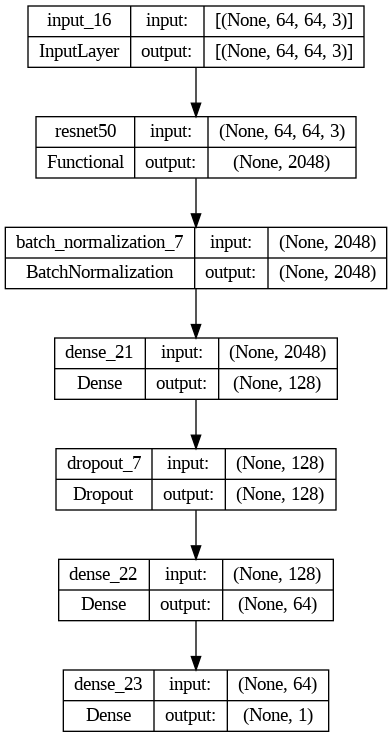

In [110]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [111]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/10
217/217 [==============================] - 58s 120ms/step - loss: 2.1280 - accuracy: 0.7532 - precision_7: 0.8060 - recall_7: 0.7646 - val_loss: 1.8494 - val_accuracy: 0.7745 - val_precision_7: 0.9351 - val_recall_7: 0.6577
Epoch 2/10
217/217 [==============================] - 34s 116ms/step - loss: 1.0882 - accuracy: 0.8538 - precision_7: 0.8674 - recall_7: 0.8875 - val_loss: 1.1613 - val_accuracy: 0.7964 - val_precision_7: 0.7484 - val_recall_7: 0.9939
Epoch 3/10
217/217 [==============================] - 34s 116ms/step - loss: 0.6607 - accuracy: 0.8839 - precision_7: 0.8906 - recall_7: 0.9157 - val_loss: 0.8554 - val_accuracy: 0.7956 - val_precision_7: 0.7458 - val_recall_7: 0.9969
Epoch 4/10
217/217 [==============================] - 34s 116ms/step - loss: 0.4646 - accuracy: 0.8945 - precision_7: 0.8970 - recall_7: 0.9261 - val_loss: 0.3878 - val_accuracy: 0.9076 - val_precision_7: 0.9008 - val_recall_7: 0.9484
E

### 결과

In [112]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 10s 20ms/step - loss: 0.2442 - accuracy: 0.9356 - precision_7: 0.9022 - recall_7: 0.9962
Val Loss: 0.2442
Val Accuracy: 0.9356
Val Precision: 0.9022
Val Recall: 0.9962


In [113]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 10s 20ms/step - loss: 0.2292 - accuracy: 0.9403 - precision_7: 0.9123 - recall_7: 0.9950
test Loss: 0.2292
test Accuracy: 0.9403
test Precision: 0.9123
test Recall: 0.9950


### Saving Model

In [114]:
#모델 저장
ResNet_model.save('ResNet_c_model.h5')
model_json = ResNet_model.to_json()
with open('ResNet_model.json','w') as f:
  f.write(model_json)
  ResNet_model.save('ResNet_c_model.h5')  # 모델 구조와 가중치를 함께 저장

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [115]:
#모델 불러오기
ResNet_model = tf.keras.models.load_model('ResNet_c_model.h5')

### 평가 + 시각화

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = ResNet_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

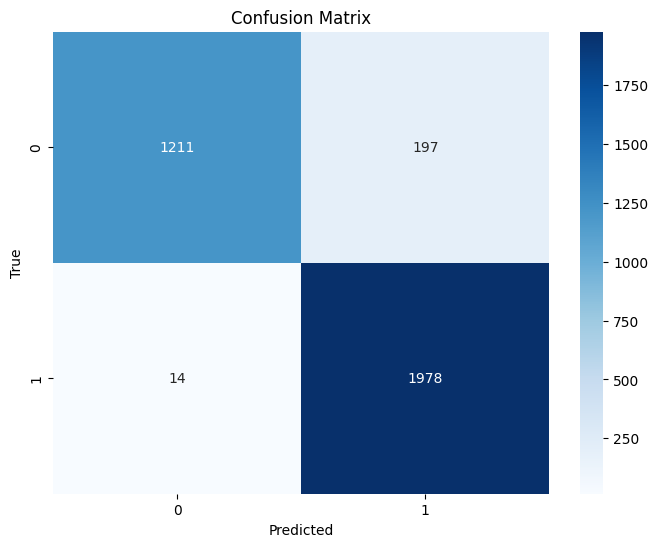

Accuracy: 0.9379411764705883
Precision: 0.9094252873563219
Recall: 0.9929718875502008
F1 Score: 0.9493640508759299


In [117]:
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

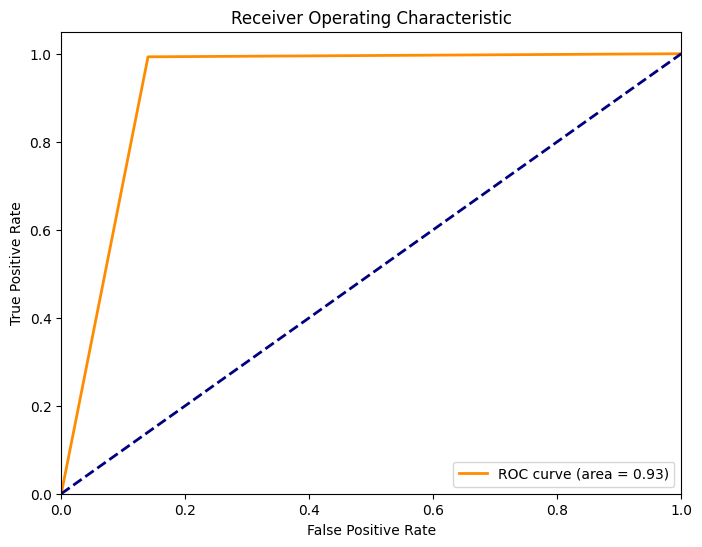

In [118]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [119]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1978
True Negative (TN): 1211
False Positive (FP): 197
False Negative (FN): 14


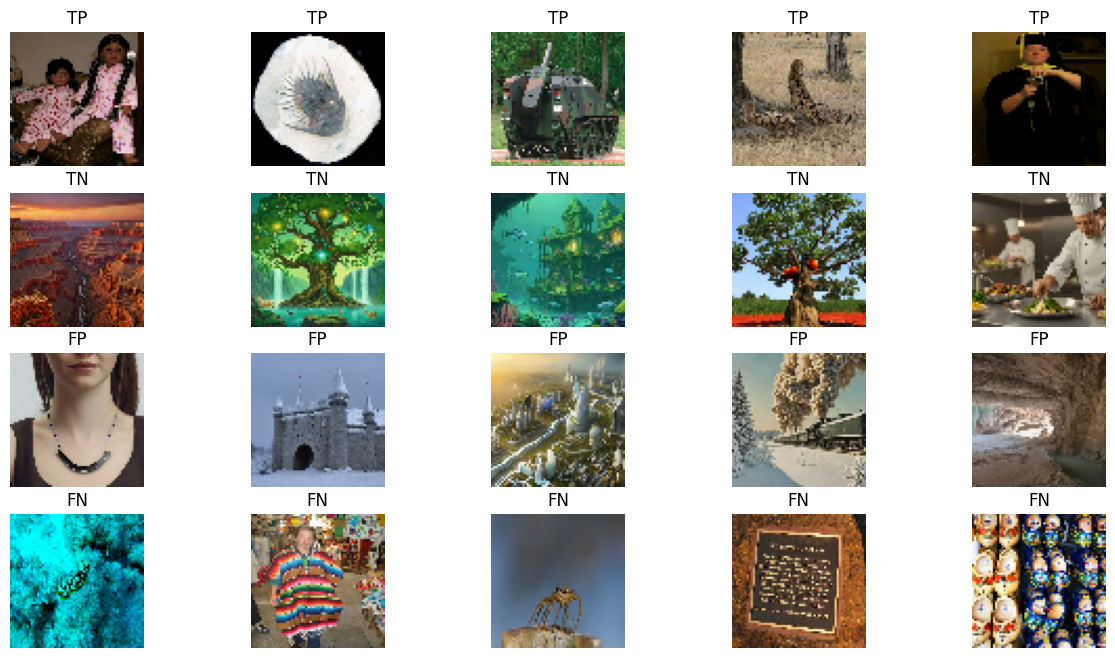

In [120]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

## **VGG16 모델**

In [94]:
# Building the Transfer Learning model using VGG16
VGG_base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
VGG_base_model.trainable = True



In [95]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [96]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                16448     
                                                           

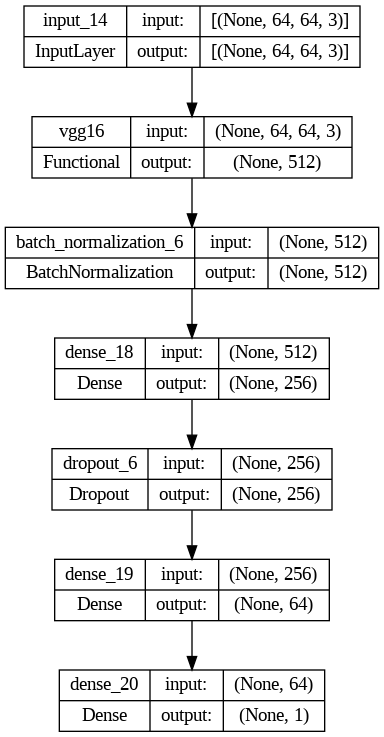

In [97]:
# Visualize the VGG model architecture
from IPython.display import Image

tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [98]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/10
217/217 [==============================] - 39s 117ms/step - loss: 2.0606 - accuracy: 0.6775 - precision_6: 0.6920 - recall_6: 0.8121 - val_loss: 1.9479 - val_accuracy: 0.4240 - val_precision_6: 1.0000 - val_recall_6: 0.0112
Epoch 2/10
217/217 [==============================] - 34s 115ms/step - loss: 0.8607 - accuracy: 0.8294 - precision_6: 0.8686 - recall_6: 0.8408 - val_loss: 0.8899 - val_accuracy: 0.6735 - val_precision_6: 0.9529 - val_recall_6: 0.4582
Epoch 3/10
217/217 [==============================] - 34s 117ms/step - loss: 0.5489 - accuracy: 0.8624 - precision_6: 0.8753 - recall_6: 0.8922 - val_loss: 0.7679 - val_accuracy: 0.7645 - val_precision_6: 0.7143 - val_recall_6: 0.9918
Epoch 4/10
217/217 [==============================] - 34s 117ms/step - loss: 0.4146 - accuracy: 0.8865 - precision_6: 0.8918 - recall_6: 0.9188 - val_loss: 1.4441 - val_accuracy: 0.5933 - val_precision_6: 0.9939 - val_recall_6: 0.3039
Epoc

### 결과

In [99]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 10s 22ms/step - loss: 0.2195 - accuracy: 0.9331 - precision_6: 0.9619 - recall_6: 0.9208
val Loss: 0.2195
Val Accuracy: 0.9331
Val Precision: 0.9619
Val Recall: 0.9208


테스트셋으로 검증

In [100]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 10s 22ms/step - loss: 0.2151 - accuracy: 0.9356 - precision_6: 0.9682 - recall_6: 0.9198
test Loss: 0.2151
test Accuracy: 0.9356
test Precision: 0.9682
test Recall: 0.9198


### Saving Model

In [101]:
VGG_model.save('VGG16_model.h5')  # 모델 구조와 가중치를 함께 저장

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
VGG_model = tf.keras.models.load_model('VGG16_model.h5')


### 평가 + 시각화

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = VGG_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

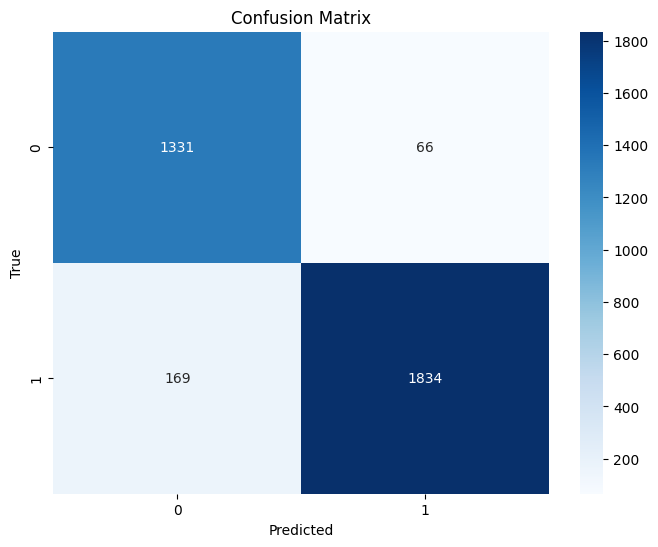

Accuracy: 0.9308823529411765
Precision: 0.9652631578947368
Recall: 0.9156265601597604
F1 Score: 0.9397899052011274


In [104]:
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

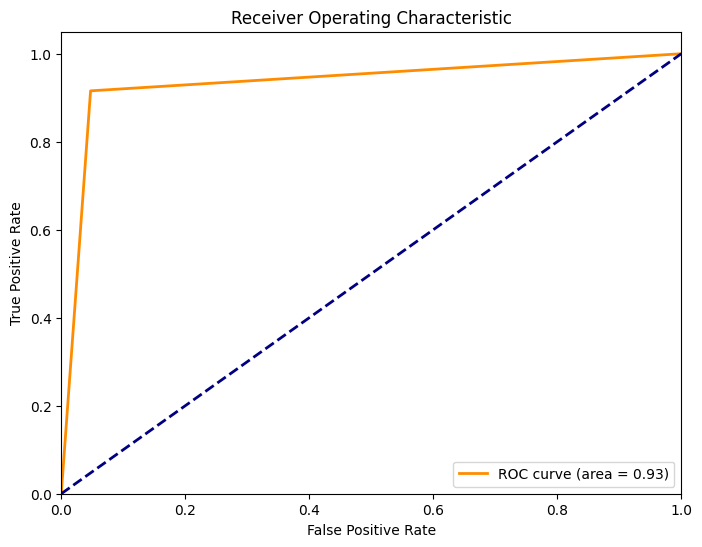

In [105]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [106]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1834
True Negative (TN): 1331
False Positive (FP): 66
False Negative (FN): 169


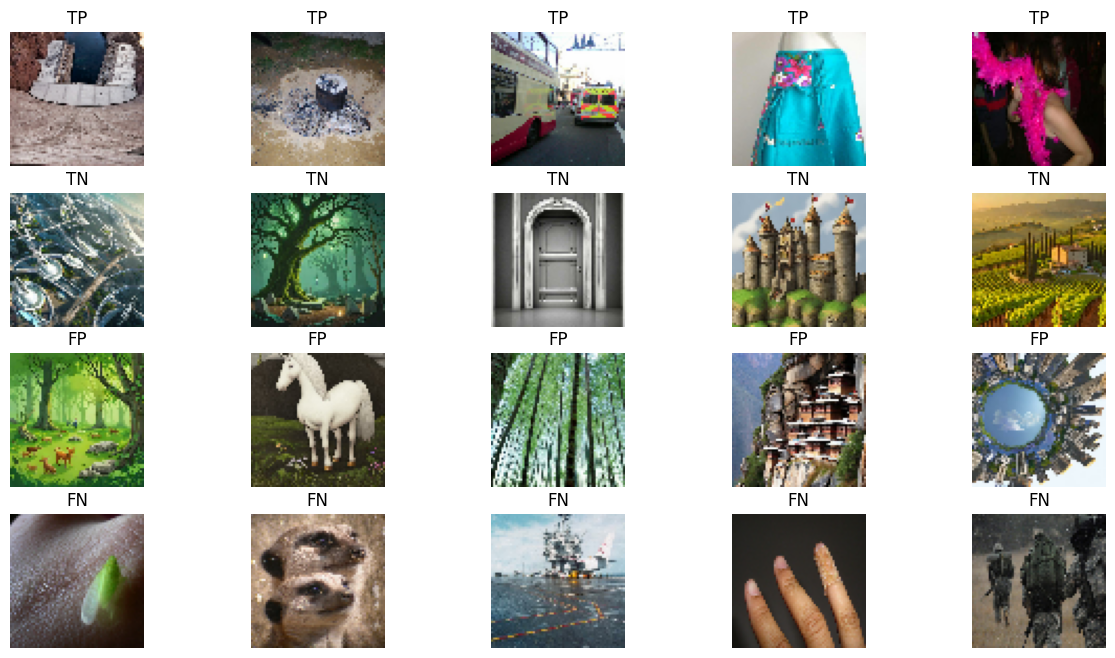

In [107]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()